In [1]:
import numpy as np
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt
import cx_Oracle
from IPython.display import display
%matplotlib inline

#import warnings
#warnings.filterwarnings('ignore')

### TIER clasification

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
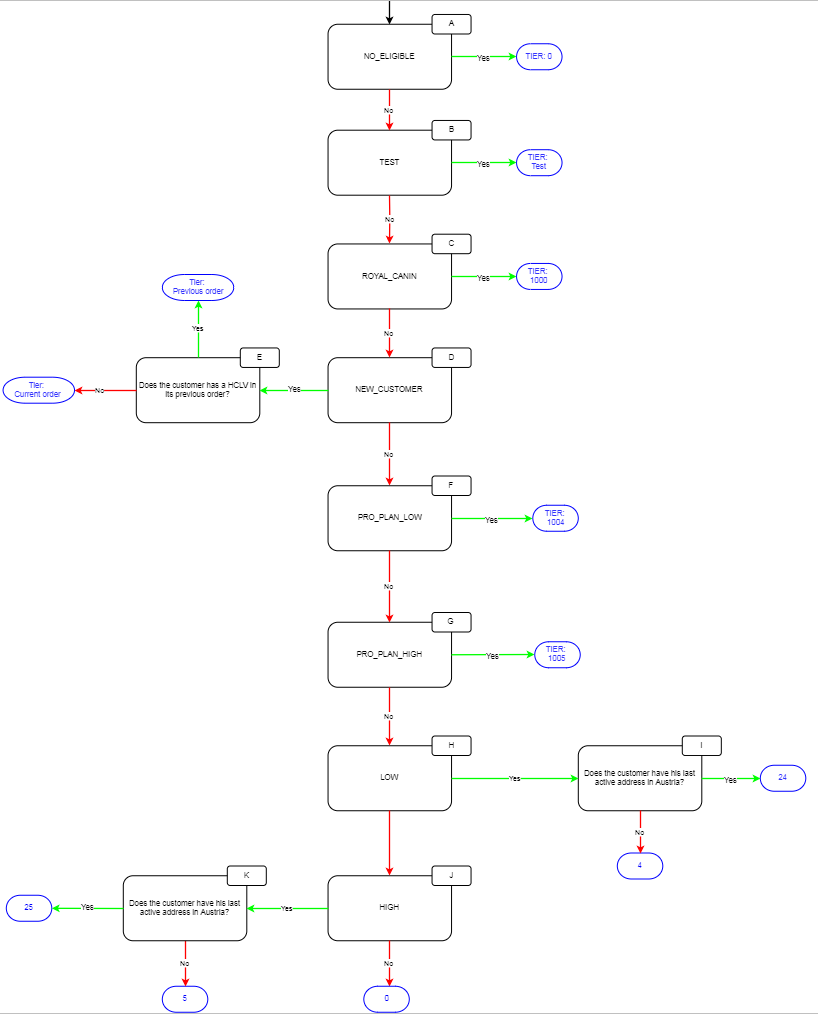

### Invitation type - BOX clasification

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
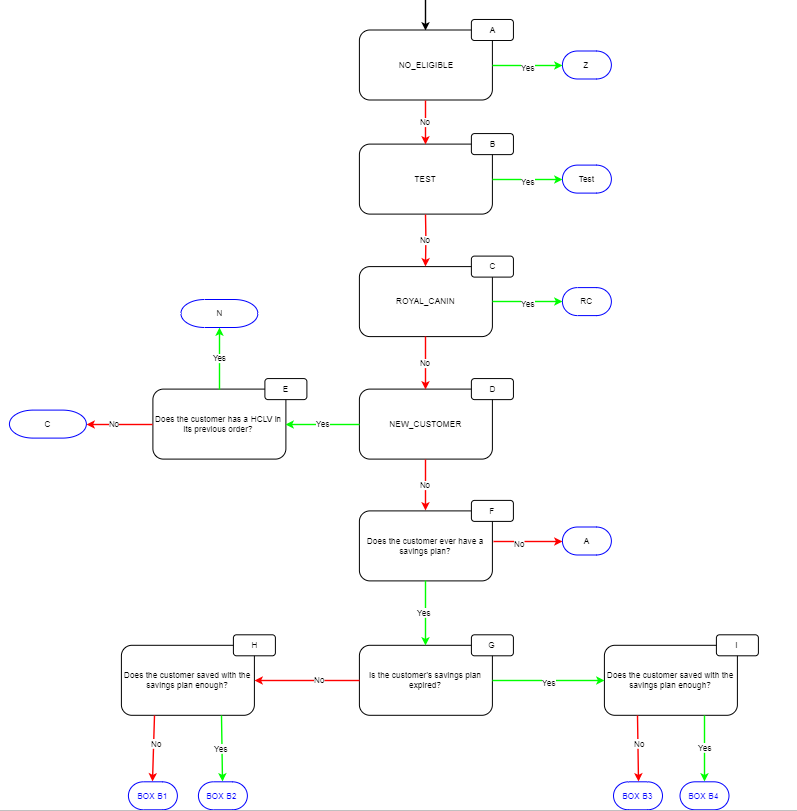

### All customers

In [2]:
data = pd.read_csv('comparison_eligibilities_per_site_23082018.dsv', sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2884 entries, 0 to 2883
Data columns (total 6 columns):
OLD_TIER               2806 non-null float64
OLD_BOX                2806 non-null object
NEW_TIER               2800 non-null float64
NEW_BOX                2800 non-null object
K_REGISTRATION_S_ID    2884 non-null int64
AMOUNT                 2884 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 135.3+ KB


In [4]:
data

,OLD_TIER,OLD_BOX,NEW_TIER,NEW_BOX,K_REGISTRATION_S_ID,AMOUNT
0,4.0,A,0.0,Z,4,141708
1,4.0,A,4.0,A,15,27200
2,4.0,B3,4.0,B4,1,34762
3,6.0,C,0.0,Z,16,110686
4,0.0,Z,0.0,Z,101,691435
5,5.0,B3,0.0,Z,18,1017
6,4.0,A,5.0,A,1,75045
7,5.0,A,5.0,A,18,8788
8,4.0,B4,4.0,B3,1,8733
9,4.0,A,6.0,N,4,17566


In [5]:
#Exclude rows with NaN values (null)
data = data[~data.apply(lambda x: x.isnull().any(), axis=1)]

In [6]:
len(data)

2761

In [7]:
data['AMOUNT'].sum()

15985153

In [8]:
#Not eligible in OLD elig
data[data['OLD_TIER'] == 0]['AMOUNT'].sum()

4303442

In [9]:
#Not segmented in OLD elig
data[data['OLD_TIER'].isnull()]['AMOUNT'].sum()

0

In [10]:
# % Not eligible in OLD elig
np.round(data[(data['OLD_TIER'] == 0) | (data['OLD_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

26.92

In [11]:
#Not eligible in NEW elig
data[data['NEW_TIER'] == 0]['AMOUNT'].sum()

11819199

In [12]:
#Not segmented in NEW elig
data[data['NEW_TIER'].isnull()]['AMOUNT'].sum()

0

In [13]:
# % Not eligible in NEW elig
np.round(data[(data['NEW_TIER'] == 0) | (data['NEW_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

73.94

In [14]:
crosstab = data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()

In [15]:
crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)

In [16]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [17]:
# Relative values of transition between old and new eligibility
crosstab_rel.style.apply(highlight_max, axis=1)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,83.81,13.3,0.42,1.68,0.32,0.01,0.1,0.36,0
4.0,39.54,36.4,16.78,6.7,0.01,0,0.32,0.21,0.04
5.0,57.23,6.41,29.19,7.03,0,0.01,0.05,0.04,0.03
6.0,85.87,0.02,0.02,14.09,0,0,0,0,0
24.0,39,0.21,0.08,10.1,38.92,11.69,0,0,0
25.0,52.8,0.07,0.24,11.07,6.41,29.4,0,0,0
1000.0,13.15,5.23,1.17,30.02,0,0,50.43,0,0
1004.0,18.76,2.32,0.31,0.71,0,0,0,72.45,5.45
1005.0,18.77,1.49,1.76,1.82,0,0,0,38.69,37.46


In [18]:
crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)

In [19]:
crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)

In [20]:
crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100

In [21]:
crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100

In [22]:
# Absolute values of transition between old and new eligibility
crosstab.fillna(0).astype(int)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,3606668,572330,18224,72185,13591,497,4287,15600,60,4303442,26
4.0,1057018,973109,448598,179139,257,62,8512,5511,945,2673151,16
5.0,1041574,116741,531211,127909,15,260,957,752,532,1819951,11
6.0,6072807,1618,1235,996317,25,11,18,21,3,7072055,44
24.0,21664,118,47,5611,21621,6494,0,0,0,55555,0
25.0,14057,19,65,2948,1706,7827,0,0,0,26622,0
1000.0,2431,968,216,5551,0,0,9325,0,0,18491,0
1004.0,2126,263,35,81,0,0,0,8212,618,11335,0
1005.0,854,68,80,83,0,0,0,1761,1705,4551,0


In [23]:
np.sort(data['K_REGISTRATION_S_ID'].unique())[:27]

array([ 1,  2,  3,  4,  7,  8,  9, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32], dtype=int64)

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
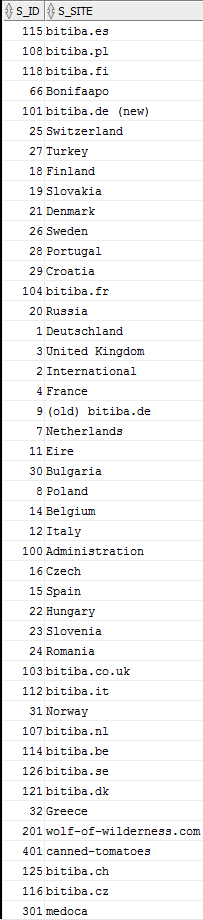

In [24]:
for i in np.sort(data['K_REGISTRATION_S_ID'].unique())[:27]:
    print('                                                SITE ' + str(i) + '                                                           ')
    cus_data = data[data['K_REGISTRATION_S_ID'] == i]
    crosstab = cus_data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()
    crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)
    display(crosstab_rel.style.apply(highlight_max, axis=1))
    crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)
    crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)
    crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100
    crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100
    display(crosstab.fillna(0).astype(int))
    print('Percentage of non-eligible customers with the old routine: ',
          np.round(cus_data[(cus_data['OLD_TIER'] == 0) | (cus_data['OLD_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('Percentage of non-eligible customers with the new routine: ',
          np.round(cus_data[(cus_data['NEW_TIER'] == 0) | (cus_data['NEW_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('_______________________________________________________________________________________________________________________')
    print('')

                                                SITE 1                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,81.65,13.4,0.55,2.86,1.48,0.05,0,0,0
4.0,40.47,35.93,14.07,9.48,0.03,0.01,0,0,0
5.0,59.82,6.63,22.81,10.71,0,0.04,0,0,0
6.0,81.16,0.01,0.01,18.81,0,0,0,0,0
24.0,39.05,0.17,0.07,10.09,38.96,11.66,0,0,0
25.0,52.92,0.06,0.19,11.09,6.4,29.34,0,0,0
1000.0,9.38,6.25,3.12,25,0,0,56.25,0,0
1004.0,16.67,4.17,0,0,0,0,0,62.5,16.67
1005.0,0,0,0,0,0,0,0,85.71,14.29


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,745391,122360,5002,26091,13554,495,31,24,0,912948,19
4.0,309953,275191,107769,72631,247,57,28,19,2,765897,16
5.0,412445,45684,157287,73825,14,258,2,2,2,689519,14
6.0,1742605,316,219,403937,25,11,0,0,0,2147113,46
24.0,21589,93,38,5581,21542,6448,0,0,0,55291,1
25.0,13989,16,49,2932,1692,7754,0,0,0,26432,0
1000.0,6,4,2,16,0,0,36,0,0,64,0
1004.0,4,1,0,0,0,0,0,15,4,24,0
1005.0,0,0,0,0,0,0,0,6,1,7,0


Percentage of non-eligible customers with the old routine:  19.86
Percentage of non-eligible customers with the new routine:  70.61
_______________________________________________________________________________________________________________________

                                                SITE 2                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,87.07,10.35,0.58,1.84,0.05,0,0.02,0.1,0
4.0,48.87,30.82,13.59,6.58,0.02,0.02,0.09,0.02,0
5.0,57.15,8.04,28.47,6.31,0,0,0,0.03,0
6.0,88.41,0.02,0.01,11.56,0,0,0,0,0
24.0,21.88,0,0,12.5,37.5,28.12,0,0,0
25.0,19.23,0,7.69,0,3.85,69.23,0,0,0
1000.0,0,6.67,13.33,26.67,0,0,53.33,0,0
1004.0,60,0,0,0,0,0,0,40,0
1005.0,0,0,0,0,0,0,0,33.33,66.67


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,5257,625,35,111,3,0,1,6,0,6038,21
4.0,2683,1692,746,361,1,1,5,1,0,5490,19
5.0,1883,265,938,208,0,0,0,1,0,3295,11
6.0,11821,3,1,1546,0,0,0,0,0,13371,47
24.0,7,0,0,4,12,9,0,0,0,32,0
25.0,5,0,2,0,1,18,0,0,0,26,0
1000.0,0,1,2,4,0,0,8,0,0,15,0
1004.0,3,0,0,0,0,0,0,2,0,5,0
1005.0,0,0,0,0,0,0,0,1,2,3,0


Percentage of non-eligible customers with the old routine:  21.35
Percentage of non-eligible customers with the new routine:  76.6
_______________________________________________________________________________________________________________________

                                                SITE 3                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,73.55,24.34,1.22,0.89,0,0,0,0
4.0,51.8,14.9,29.34,3.96,0,0,0,0
5.0,68.81,5.33,22.06,3.8,0,0,0,0
6.0,93.53,0.01,0.01,6.44,0,0,0,0
24.0,51.85,7.41,0,3.7,18.52,18.52,0,0
25.0,59.38,0,3.12,3.12,3.12,31.25,0,0
1000.0,0,0,10,20,0,0,70,0
1004.0,33.33,0,0,0,0,0,0,66.67
1005.0,100,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,311188,102974,5172,3770,3,1,1,4,423113,31
4.0,85310,24533,48321,6530,0,2,6,1,164703,12
5.0,82062,6354,26312,4534,1,0,1,0,119264,8
6.0,598270,79,93,41201,0,0,0,0,639643,47
24.0,14,2,0,1,5,5,0,0,27,0
25.0,19,0,1,1,1,10,0,0,32,0
1000.0,0,0,1,2,0,0,7,0,10,0
1004.0,2,0,0,0,0,0,0,4,6,0
1005.0,1,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  31.42
Percentage of non-eligible customers with the new routine:  79.96
_______________________________________________________________________________________________________________________

                                                SITE 4                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,73.98,20.76,0.23,2.04,0,0,0,2.99,0.01
4.0,40.14,38.35,14.6,5.56,0,0,0,1.16,0.2
5.0,62.28,5.3,27.99,4.04,0,0,0,0.23,0.16
6.0,89.28,0.03,0.02,10.68,0,0,0,0,0
24.0,19.05,14.29,4.76,14.29,33.33,14.29,0,0,0
25.0,50,0,0,30,10,10,0,0,0
1000.0,0,33.33,0,33.33,0,0,33.33,0,0
1004.0,18.77,2.31,0.3,0.72,0,0,0,72.46,5.43
1005.0,18.66,1.51,1.77,1.82,0,0,0,38.75,37.49


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,384238,107805,1174,10609,0,0,3,15517,59,519405,20
4.0,189932,181452,69071,26284,0,0,3,5469,933,473144,18
5.0,203051,17274,91236,13187,0,0,0,742,526,326016,13
6.0,1034881,325,209,123747,0,0,0,21,2,1159185,46
24.0,4,3,1,3,7,3,0,0,0,21,0
25.0,5,0,0,3,1,1,0,0,0,10,0
1000.0,0,1,0,1,0,0,1,0,0,3,0
1004.0,2110,260,34,81,0,0,0,8145,610,11240,0
1005.0,841,68,80,82,0,0,0,1747,1690,4508,0


Percentage of non-eligible customers with the old routine:  20.83
Percentage of non-eligible customers with the new routine:  72.79
_______________________________________________________________________________________________________________________

                                                SITE 7                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,80.95,14.66,0.44,2.4,0,0,1.54,0,0
4.0,37.88,39.86,12.91,6.09,0,0,3.26,0,0
5.0,54.61,6.32,33.95,4.61,0,0,0.51,0,0
6.0,86.12,0.03,0.04,13.81,0,0,0,0,0
24.0,27.78,0,0,16.67,33.33,22.22,0,0,0
25.0,28.57,7.14,21.43,0,14.29,28.57,0,0,0
1000.0,13.14,5.24,1.15,30.08,0,0,50.39,0,0
1004.0,0,0,0,0,0,0,0,80,20


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,222431,40291,1217,6608,1,0,4233,0,0,274781,22
4.0,98055,103175,33412,15772,0,0,8435,0,1,258850,21
5.0,100614,11636,62552,8485,0,0,948,0,0,184235,15
6.0,410626,152,167,65831,0,0,18,0,0,476794,39
24.0,5,0,0,3,6,4,0,0,0,18,0
25.0,4,1,3,0,2,4,0,0,0,14,0
1000.0,2410,961,210,5516,0,0,9239,0,0,18336,1
1004.0,0,0,0,0,0,0,0,4,1,5,0
SUM_NEW_TIER,834145,156216,97561,102215,9,8,22873,4,2,1213033,100


Percentage of non-eligible customers with the old routine:  22.65
Percentage of non-eligible customers with the new routine:  68.77
_______________________________________________________________________________________________________________________

                                                SITE 8                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0
OLD_TIER,,,,,,,
0.0,88.54,9.63,0.51,1.32,0,0,0
4.0,26,47.05,22.74,4.21,0,0,0
5.0,33.38,5.78,56.06,4.78,0,0,0
6.0,79.2,0.03,0.04,20.73,0,0,0
24.0,13.33,26.67,0,13.33,33.33,13.33,0
25.0,57.14,0,0,14.29,0,28.57,0
1000.0,44.44,11.11,0,11.11,0,0,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,232861,25329,1341,3467,5,0,2,263005,33
4.0,45228,81841,39556,7326,1,0,3,173955,22
5.0,22423,3886,37660,3213,0,0,0,67182,8
6.0,221517,82,108,57975,0,0,0,279682,35
24.0,2,4,0,2,5,2,0,15,0
25.0,4,0,0,1,0,2,0,7,0
1000.0,4,1,0,1,0,0,3,9,0
SUM_NEW_TIER,522039,111143,78665,71985,11,4,8,783855,100
NEW_DIST%,66,14,10,9,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  33.55
Percentage of non-eligible customers with the new routine:  66.6
_______________________________________________________________________________________________________________________

                                                SITE 9                                                           


NEW_TIER,0.0
OLD_TIER,
0.0,100


NEW_TIER,0.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,
0.0,1,1,100
SUM_NEW_TIER,1,1,100
NEW_DIST%,100,100,10000


Percentage of non-eligible customers with the old routine:  100.0
Percentage of non-eligible customers with the new routine:  100.0
_______________________________________________________________________________________________________________________

                                                SITE 11                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,89.99,5.86,0.14,4.01,0.01,0,0.01
4.0,45.59,44.52,3.36,6.51,0.01,0,0.01
5.0,62.49,10.19,22.94,4.38,0,0,0
6.0,85.98,0.05,0,13.96,0,0,0
24.0,25,0,0,0,25,50,0
25.0,66.67,0,0,0,0,33.33,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,13308,866,20,593,1,0,1,14789,21
4.0,5802,5666,428,828,1,0,1,12726,18
5.0,3298,538,1211,231,0,0,0,5278,7
6.0,29892,19,1,4853,0,0,0,34765,51
24.0,1,0,0,0,1,2,0,4,0
25.0,2,0,0,0,0,1,0,3,0
SUM_NEW_TIER,52303,7089,1660,6505,3,3,2,67565,100
NEW_DIST%,77,10,2,9,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  21.89
Percentage of non-eligible customers with the new routine:  77.41
_______________________________________________________________________________________________________________________

                                                SITE 12                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,72.68,24.91,0.36,2.05,0,0,0,0
4.0,32.5,37.58,23.22,6.71,0,0,0,0
5.0,50.07,7.82,36.57,5.54,0,0,0,0
6.0,85.27,0.03,0.02,14.69,0,0,0,0
24.0,41.38,24.14,3.45,17.24,10.34,3.45,0,0
25.0,50,0,0,16.67,8.33,25,0,0
1000.0,0,0,0,100,0,0,0,0
1004.0,0,0,0,0,0,0,0,100
1005.0,66.67,0,0,0,0,0,0,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,181535,62222,908,5111,1,0,1,0,249778,26
4.0,63010,72864,45019,13011,0,0,0,0,193904,20
5.0,51903,8103,37906,5740,0,0,2,1,103655,10
6.0,337209,127,67,58080,0,0,0,0,395483,41
24.0,12,7,1,5,3,1,0,0,29,0
25.0,6,0,0,2,1,3,0,0,12,0
1000.0,0,0,0,1,0,0,0,0,1,0
1004.0,0,0,0,0,0,0,0,2,2,0
1005.0,2,0,0,0,0,0,0,1,3,0


Percentage of non-eligible customers with the old routine:  26.49
Percentage of non-eligible customers with the new routine:  67.21
_______________________________________________________________________________________________________________________

                                                SITE 14                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,77.99,19.77,0.22,1.9,0,0,0.03,0.08,0
4.0,28.14,44.57,19.76,7.4,0,0,0.08,0.05,0.01
5.0,47.06,9.06,38.59,5.23,0,0,0.02,0.03,0.01
6.0,83.72,0.06,0.03,16.19,0,0,0,0,0
24.0,37.5,12.5,12.5,12.5,25,0,0,0,0
25.0,0,0,0,0,0,100,0,0,0
1000.0,17.02,0,2.13,21.28,0,0,59.57,0,0
1004.0,13.33,4.44,0,0,0,0,0,80,2.22
1005.0,36.36,0,0,4.55,0,0,0,27.27,31.82


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,41293,10469,117,1006,0,0,14,45,0,52944,28
4.0,10573,16749,7425,2779,1,0,29,17,5,37578,20
5.0,10738,2068,8806,1193,0,0,4,6,2,22817,12
6.0,62289,45,25,12043,0,0,0,0,0,74402,39
24.0,3,1,1,1,2,0,0,0,0,8,0
25.0,0,0,0,0,0,1,0,0,0,1,0
1000.0,8,0,1,10,0,0,28,0,0,47,0
1004.0,6,2,0,0,0,0,0,36,1,45,0
1005.0,8,0,0,1,0,0,0,6,7,22,0


Percentage of non-eligible customers with the old routine:  28.18
Percentage of non-eligible customers with the new routine:  66.49
_______________________________________________________________________________________________________________________

                                                SITE 15                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,79.75,16.55,0.84,2.85,0,0,0,0,0
4.0,40.67,26.44,26.36,6.52,0,0,0,0,0
5.0,65.38,3.91,25.78,4.92,0,0,0,0,0
6.0,86.08,0.03,0.03,13.86,0,0,0,0,0
24.0,45.45,9.09,9.09,9.09,18.18,9.09,0,0,0
25.0,50,0,0,0,7.14,42.86,0,0,0
1000.0,60,0,0,0,0,0,40,0,0
1004.0,20,0,20,0,0,0,0,60,0
1005.0,100,0,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,159823,33162,1686,5715,5,0,1,3,1,200396,25
4.0,59681,38797,38681,9564,1,1,3,1,0,146729,18
5.0,58814,3520,23194,4429,0,2,0,0,0,89959,11
6.0,300902,95,110,48456,0,0,0,0,1,349564,44
24.0,5,1,1,1,2,1,0,0,0,11,0
25.0,7,0,0,0,1,6,0,0,0,14,0
1000.0,3,0,0,0,0,0,2,0,0,5,0
1004.0,1,0,1,0,0,0,0,3,0,5,0
1005.0,1,0,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  25.47
Percentage of non-eligible customers with the new routine:  73.63
_______________________________________________________________________________________________________________________

                                                SITE 16                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,76.64,19.37,0.37,3.62,0,0
4.0,26.51,51.52,14.26,7.71,0,0
5.0,43.91,5.07,44.93,6.09,0,0
6.0,76.78,0.02,0.01,23.19,0,0
24.0,55.56,0,11.11,0,22.22,11.11
25.0,0,0,20,0,40,40


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,62042,15680,297,2934,1,1,80955,23
4.0,18180,35337,9781,5285,0,0,68583,19
5.0,15011,1734,15357,2081,0,0,34183,9
6.0,125192,35,20,37804,0,0,163051,47
24.0,5,0,1,0,2,1,9,0
25.0,0,0,1,0,2,2,5,0
SUM_NEW_TIER,220430,52786,25457,48104,5,4,346786,100
NEW_DIST%,63,15,7,13,0,0,100,0


Percentage of non-eligible customers with the old routine:  23.34
Percentage of non-eligible customers with the new routine:  63.56
_______________________________________________________________________________________________________________________

                                                SITE 18                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,85.57,11.19,0.26,2.97,0
4.0,36.05,42.99,12.36,8.6,0
5.0,51.18,8.84,31.6,8.38,0
6.0,84.43,0.03,0.02,15.53,0
24.0,50,0,0,0,50
25.0,50,0,0,50,0


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,36991,4838,114,1284,0,43227,17
4.0,18778,22389,6438,4480,0,52085,21
5.0,15997,2763,9878,2621,0,31259,12
6.0,96893,29,24,17819,0,114765,47
24.0,1,0,0,0,1,2,0
25.0,1,0,0,1,0,2,0
SUM_NEW_TIER,168661,30019,16454,26205,1,241340,100
NEW_DIST%,69,12,6,10,0,100,0


Percentage of non-eligible customers with the old routine:  17.91
Percentage of non-eligible customers with the new routine:  69.89
_______________________________________________________________________________________________________________________

                                                SITE 19                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,75.66,23,0.5,0.8,0.04,0
4.0,36.97,35.9,23.41,3.69,0.03,0
5.0,48.51,3.61,43.77,4.12,0,0
6.0,93.03,0.03,0.02,6.93,0,0
24.0,23.53,0,2.94,5.88,38.24,29.41
25.0,37.5,0,20.83,0,4.17,37.5


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,16162,4912,107,171,8,0,21360,22
4.0,5432,5275,3439,542,5,0,14693,15
5.0,4419,329,3987,375,0,0,9110,9
6.0,47100,15,8,3507,0,0,50630,52
24.0,8,0,1,2,13,10,34,0
25.0,9,0,5,0,1,9,24,0
SUM_NEW_TIER,73130,10531,7547,4597,27,19,95851,100
NEW_DIST%,76,10,7,4,0,0,100,0


Percentage of non-eligible customers with the old routine:  22.28
Percentage of non-eligible customers with the new routine:  76.3
_______________________________________________________________________________________________________________________

                                                SITE 20                                                           


NEW_TIER,0.0,4.0,5.0,6.0,1004.0
OLD_TIER,,,,,
0.0,87.72,8.59,0.04,3.65,0
4.0,10.39,72.14,9.61,7.86,0
5.0,17.68,8.96,69.01,4.36,0
6.0,61.96,0,0.06,37.98,0
1004.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,2358,231,1,98,0,2688,34
4.0,148,1028,137,112,0,1425,18
5.0,73,37,285,18,0,413,5
6.0,2041,0,2,1251,0,3294,42
1004.0,0,0,0,0,1,1,0
SUM_NEW_TIER,4620,1296,425,1479,1,7821,100
NEW_DIST%,59,16,5,18,0,100,1


Percentage of non-eligible customers with the old routine:  34.37
Percentage of non-eligible customers with the new routine:  59.07
_______________________________________________________________________________________________________________________

                                                SITE 21                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0
OLD_TIER,,,,,
0.0,75.07,22.63,0.24,2.06,0
4.0,32.79,46.53,14.79,5.89,0
5.0,46.08,8.12,41.19,4.61,0
6.0,87.78,0.05,0.04,12.14,0
24.0,40,20,0,0,40
25.0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,43748,13190,139,1202,0,58279,20
4.0,19245,27309,8682,3455,0,58691,20
5.0,18891,3328,16885,1888,0,40992,14
6.0,115894,60,48,16033,0,132035,45
24.0,2,1,0,0,2,5,0
25.0,0,0,0,1,0,1,0
SUM_NEW_TIER,197780,43888,25754,22579,2,290003,100
NEW_DIST%,68,15,8,7,0,100,0


Percentage of non-eligible customers with the old routine:  20.1
Percentage of non-eligible customers with the new routine:  68.2
_______________________________________________________________________________________________________________________

                                                SITE 22                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,76.5,21.49,0.84,1.14,0.02,0,0
4.0,20.25,33.74,42.24,3.76,0,0,0.01
5.0,31.66,4.55,60.68,3.11,0,0,0
6.0,88.38,0.03,0.05,11.55,0,0,0
24.0,15.79,0,10.53,10.53,31.58,31.58,0
25.0,20,0,0,13.33,20,46.67,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,25679,7213,283,384,7,0,0,33566,29
4.0,2993,4987,6243,556,0,0,1,14780,12
5.0,2045,294,3919,201,0,0,0,6459,5
6.0,52291,16,27,6833,0,0,0,59167,51
24.0,3,0,2,2,6,6,0,19,0
25.0,3,0,0,2,3,7,0,15,0
SUM_NEW_TIER,83014,12510,10474,7978,16,13,1,114006,100
NEW_DIST%,72,10,9,6,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  29.44
Percentage of non-eligible customers with the new routine:  72.82
_______________________________________________________________________________________________________________________

                                                SITE 23                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,85.03,12.83,0.1,2.04,0,0
4.0,19.02,65.38,8.86,6.73,0,0
5.0,21.54,16.01,57.69,4.76,0,0
6.0,80,0.06,0.02,19.93,0,0
24.0,22.22,0,0,11.11,66.67,0
25.0,9.09,18.18,9.09,27.27,9.09,27.27


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,11117,1677,13,267,0,0,13074,23
4.0,2297,7894,1070,813,0,0,12074,21
5.0,1380,1026,3696,305,0,0,6407,11
6.0,18703,13,5,4659,0,0,23380,42
24.0,2,0,0,1,6,0,9,0
25.0,1,2,1,3,1,3,11,0
SUM_NEW_TIER,33500,10612,4785,6048,7,3,54955,100
NEW_DIST%,60,19,8,11,0,0,100,0


Percentage of non-eligible customers with the old routine:  23.79
Percentage of non-eligible customers with the new routine:  60.96
_______________________________________________________________________________________________________________________

                                                SITE 24                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,90.19,8.09,0.42,1.29,0,0
4.0,15.89,48.76,31.57,3.76,0,0.01
5.0,19.7,3.91,72.47,3.91,0,0
6.0,88.26,0.02,0.02,11.7,0,0
24.0,0,0,0,40,40,20
25.0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,15626,1402,73,224,0,0,17325,22
4.0,1756,5388,3489,416,0,1,11050,14
5.0,715,142,2630,142,0,0,3629,4
6.0,40020,11,7,5304,0,0,45342,58
24.0,0,0,0,2,2,1,5,0
25.0,0,0,0,0,0,1,1,0
SUM_NEW_TIER,58117,6943,6199,6088,2,3,77352,100
NEW_DIST%,75,8,8,7,0,0,100,0


Percentage of non-eligible customers with the old routine:  22.4
Percentage of non-eligible customers with the new routine:  75.13
_______________________________________________________________________________________________________________________

                                                SITE 25                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,93.76,2.86,0.86,2.51,0,0,0,0,0
4.0,13.5,65.18,9.52,11.78,0,0,0,0,0.01
5.0,11.74,22.58,51.22,14.45,0,0,0,0,0.01
6.0,44.43,0.1,0.05,55.41,0,0,0,0,0
24.0,6.25,37.5,6.25,18.75,31.25,0,0,0,0
25.0,20,0,30,20,0,30,0,0,0
1000.0,0,0,0,0,0,0,100,0,0
1004.0,0,0,0,0,0,0,0,0,100
1005.0,16.67,0,0,0,0,0,0,0,83.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,30242,924,278,809,1,0,0,0,0,32254,17
4.0,5346,25806,3771,4665,0,0,0,1,4,39593,22
5.0,3217,6186,14030,3957,0,0,0,0,2,27392,15
6.0,35704,84,41,44529,0,0,0,0,0,80358,44
24.0,1,6,1,3,5,0,0,0,0,16,0
25.0,2,0,3,2,0,3,0,0,0,10,0
1000.0,0,0,0,0,0,0,1,0,0,1,0
1004.0,0,0,0,0,0,0,0,0,2,2,0
1005.0,1,0,0,0,0,0,0,0,5,6,0


Percentage of non-eligible customers with the old routine:  17.96
Percentage of non-eligible customers with the new routine:  41.48
_______________________________________________________________________________________________________________________

                                                SITE 26                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,73.98,24.63,0.36,1.03
4.0,25.49,44.81,24.69,5.01
5.0,39.34,6.86,47.76,6.04
6.0,87.66,0.03,0.02,12.28


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,38627,12859,190,540,52216,19
4.0,13220,23237,12807,2598,51862,18
5.0,6669,1163,8096,1023,16951,6
6.0,134813,49,32,18892,153786,55
SUM_NEW_TIER,193329,37308,21125,23053,274815,100
NEW_DIST%,70,13,7,8,100,0


Percentage of non-eligible customers with the old routine:  19.0
Percentage of non-eligible customers with the new routine:  70.35
_______________________________________________________________________________________________________________________

                                                SITE 27                                                           


NEW_TIER,0.0
OLD_TIER,
4.0,100
6.0,100


NEW_TIER,0.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,
4.0,1,1,33
6.0,2,2,66
SUM_NEW_TIER,3,3,100
NEW_DIST%,100,100,3333


Percentage of non-eligible customers with the old routine:  0.0
Percentage of non-eligible customers with the new routine:  100.0
_______________________________________________________________________________________________________________________

                                                SITE 28                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,87.07,7.49,0.11,5.33
4.0,13.7,67.9,10.65,7.75
5.0,16.79,5.97,73.13,4.1
6.0,67.73,0.14,0.02,32.11


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,9280,798,12,568,10658,24
4.0,750,3716,583,424,5473,12
5.0,225,80,980,55,1340,3
6.0,17526,35,5,8309,25875,59
SUM_NEW_TIER,27781,4629,1580,9356,43346,100
NEW_DIST%,64,10,3,21,100,0


Percentage of non-eligible customers with the old routine:  24.59
Percentage of non-eligible customers with the new routine:  64.09
_______________________________________________________________________________________________________________________

                                                SITE 29                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,85.67,11.78,0.24,2.3,0.01,0
4.0,12.88,68.34,13.78,5,0,0
5.0,15.37,5.67,75.96,3.01,0,0
6.0,80.66,0.07,0.04,19.23,0,0
25.0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,6707,922,19,180,1,0,7829,27
4.0,650,3448,695,252,0,0,5045,17
5.0,358,132,1769,70,0,0,2329,8
6.0,10978,10,5,2617,0,0,13610,47
25.0,0,0,0,0,0,1,1,0
SUM_NEW_TIER,18693,4512,2488,3119,1,1,28814,100
NEW_DIST%,64,15,8,10,0,0,100,0


Percentage of non-eligible customers with the old routine:  27.17
Percentage of non-eligible customers with the new routine:  64.87
_______________________________________________________________________________________________________________________

                                                SITE 30                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,72.52,25.84,0.43,1.22,0
4.0,8.26,58.26,29.23,4.25,0
5.0,12.2,4.96,78.87,3.97,0
6.0,86.37,0.04,0.02,13.57,0
25.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,3918,1396,23,66,0,5403,25
4.0,200,1411,708,103,0,2422,11
5.0,123,50,795,40,0,1008,4
6.0,10403,5,2,1634,0,12044,57
25.0,0,0,0,0,1,1,0
SUM_NEW_TIER,14644,2862,1528,1843,1,20878,100
NEW_DIST%,70,13,7,8,0,100,0


Percentage of non-eligible customers with the old routine:  25.88
Percentage of non-eligible customers with the new routine:  70.14
_______________________________________________________________________________________________________________________

                                                SITE 31                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,94.96,2.22,0.04,2.78
4.0,10.54,76.26,6.46,6.74
5.0,9.8,5.33,81.07,3.8
6.0,73.9,0.05,0.04,26.01


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,7065,165,3,207,7440,18
4.0,502,3634,308,321,4765,12
5.0,204,111,1687,79,2081,5
6.0,18395,13,9,6475,24892,63
SUM_NEW_TIER,26166,3923,2007,7082,39178,100
NEW_DIST%,66,10,5,18,100,0


Percentage of non-eligible customers with the old routine:  18.99
Percentage of non-eligible customers with the new routine:  66.79
_______________________________________________________________________________________________________________________

                                                SITE 32                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,93.6,0.68,0,5.73
4.0,36.52,54.12,3.56,5.81
5.0,3.87,24.52,65.81,5.81
6.0,67.07,0,0,32.93


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,2762,20,0,169,2951,23
4.0,195,289,19,31,534,4
5.0,6,38,102,9,155,1
6.0,6073,0,0,2982,9055,71
SUM_NEW_TIER,9036,347,121,3191,12695,100
NEW_DIST%,71,2,0,25,100,0


Percentage of non-eligible customers with the old routine:  23.25
Percentage of non-eligible customers with the new routine:  71.18
_______________________________________________________________________________________________________________________



### Only 'active' customers (at least 1 order within the last 3 years)

In [25]:
data = pd.read_csv('comparison_eligibilities_per_site_active_customers_23082018.dsv', sep=';')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 6 columns):
OLD_TIER               2771 non-null float64
OLD_BOX                2771 non-null object
NEW_TIER               2763 non-null float64
NEW_BOX                2763 non-null object
K_REGISTRATION_S_ID    2847 non-null int64
AMOUNT                 2847 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 133.5+ KB


In [27]:
data

,OLD_TIER,OLD_BOX,NEW_TIER,NEW_BOX,K_REGISTRATION_S_ID,AMOUNT
0,0.0,Z,0.0,Z,22,24322
1,4.0,A,5.0,A,1,74765
2,0.0,Z,0.0,Z,101,446648
3,0.0,Z,0.0,Z,126,14096
4,0.0,Z,4.0,A,12,59137
5,5.0,A,5.0,A,2,733
6,4.0,A,4.0,A,16,29524
7,4.0,B1,4.0,B2,3,1359
8,4.0,B3,4.0,B4,1,34680
9,0.0,Z,0.0,Z,28,9000


In [28]:
#Exclude rows with NaN values (null)
data = data[~data.apply(lambda x: x.isnull().any(), axis=1)]

In [29]:
len(data)

2726

In [30]:
data['AMOUNT'].sum()

9590664

In [31]:
#Not eligible in OLD elig
data[data['OLD_TIER'] == 0]['AMOUNT'].sum()

3534677

In [32]:
#Not segmented in OLD elig
data[data['OLD_TIER'].isnull()]['AMOUNT'].sum()

0

In [33]:
# % Not eligible in OLD elig
np.round(data[(data['OLD_TIER'] == 0) | (data['OLD_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

36.86

In [34]:
#Not eligible in NEW elig
data[data['NEW_TIER'] == 0]['AMOUNT'].sum()

5478442

In [35]:
#Not segmented in NEW elig
data[data['NEW_TIER'].isnull()]['AMOUNT'].sum()

0

In [36]:
# % Not eligible in NEW elig
np.round(data[(data['NEW_TIER'] == 0) | (data['NEW_TIER'].isnull())]['AMOUNT'].sum() / data['AMOUNT'].sum() * 100, 2)

57.12

In [37]:
crosstab = data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()

In [38]:
crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)

In [39]:
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

In [40]:
# Relative values of transition between old and new eligibility
crosstab_rel.style.apply(highlight_max, axis=1)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,80.41,16.18,0.51,1.93,0.38,0.01,0.12,0.44,0
4.0,18.08,49.7,22.9,8.55,0.01,0,0.43,0.28,0.05
5.0,19.86,12.21,55.13,12.54,0,0.03,0.1,0.08,0.06
6.0,68.01,0.05,0.04,31.89,0,0,0,0,0
24.0,9.26,0.32,0.12,14.28,58.48,17.54,0,0,0
25.0,6.67,0.14,0.48,20.95,12.85,58.92,0,0,0
1000.0,13.15,5.23,1.17,30.02,0,0,50.43,0,0
1004.0,18.76,2.32,0.31,0.71,0,0,0,72.45,5.45
1005.0,18.77,1.49,1.76,1.82,0,0,0,38.69,37.46


In [41]:
crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)

In [42]:
crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)

In [43]:
#Calculate final % per Tier with the old/new routine

In [44]:
crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100

In [45]:
crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100

In [46]:
# Absolute values of transition between old and new eligibility
crosstab.fillna(0).astype(int)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,2842365,571855,18191,68260,13575,497,4285,15589,60,3534677,36
4.0,353101,970669,447218,167035,256,62,8487,5464,938,1953230,20
5.0,189593,116526,526171,119659,15,260,952,749,525,954450,9
6.0,2083670,1618,1235,977165,25,11,18,21,3,3063766,31
24.0,3418,118,46,5269,21579,6471,0,0,0,36901,0
25.0,884,19,64,2778,1704,7814,0,0,0,13263,0
1000.0,2431,968,216,5551,0,0,9325,0,0,18491,0
1004.0,2126,263,35,81,0,0,0,8212,618,11335,0
1005.0,854,68,80,83,0,0,0,1761,1705,4551,0


In [47]:
np.sort(data['K_REGISTRATION_S_ID'].unique())[:26]

array([ 1,  2,  3,  4,  7,  8,  9, 11, 12, 14, 15, 16, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 28, 29, 30, 31, 32], dtype=int64)

### Let's see the overview only with data coming from Z+ Shops 'active' customers (not bitiba and others)

In [48]:
zp_data = data[data['K_REGISTRATION_S_ID'].isin(np.sort(data['K_REGISTRATION_S_ID'].unique())[:26])]

In [49]:
zp_crosstab = zp_data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()

In [50]:
zp_crosstab_rel = zp_crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)

In [51]:
# Relative values of transition between old and new eligibility
zp_crosstab_rel.style.apply(highlight_max, axis=1)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,75.29,20.41,0.65,2.44,0.48,0.02,0.15,0.56,0
4.0,14.21,52.04,23.98,8.96,0.01,0,0.46,0.29,0.05
5.0,18.01,12.49,56.4,12.83,0,0.03,0.1,0.08,0.06
6.0,63.25,0.06,0.05,36.64,0,0,0,0,0
24.0,9.26,0.32,0.12,14.28,58.48,17.54,0,0,0
25.0,6.67,0.14,0.48,20.95,12.85,58.92,0,0,0
1000.0,13.15,5.23,1.17,30.02,0,0,50.43,0,0
1004.0,18.76,2.32,0.31,0.71,0,0,0,72.45,5.45
1005.0,18.77,1.49,1.76,1.82,0,0,0,38.69,37.46


In [52]:
zp_crosstab['SUM_OLD_TIER'] = zp_crosstab.apply(np.sum, axis=1)

In [53]:
zp_crosstab.loc['SUM_NEW_TIER'] = zp_crosstab.apply(np.sum, axis=0)

In [54]:
#Calculate final % per Tier with the old/new routine

In [55]:
zp_crosstab['OLD_DIST%'] = zp_crosstab['SUM_OLD_TIER'] / zp_crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100

In [56]:
zp_crosstab.loc['NEW_DIST%'] = zp_crosstab.loc['SUM_NEW_TIER'] / zp_crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100

In [57]:
# Absolute values of transition between old and new eligibility
zp_crosstab.fillna(0).astype(int)

NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,2109158,571855,18191,68259,13575,497,4285,15589,60,2801469,33
4.0,264934,970668,447218,167035,256,62,8487,5464,938,1865062,22
5.0,168038,116526,526160,119659,15,260,952,749,525,932884,11
6.0,1686739,1618,1235,977165,25,11,18,21,3,2666835,31
24.0,3418,118,46,5269,21579,6471,0,0,0,36901,0
25.0,884,19,64,2778,1704,7814,0,0,0,13263,0
1000.0,2431,968,216,5551,0,0,9325,0,0,18491,0
1004.0,2126,263,35,81,0,0,0,8212,618,11335,0
1005.0,854,68,80,83,0,0,0,1761,1705,4551,0


#### Insights:
+ Tiers 4 (from 22% to 19%) and 5 (11% of the customers) stay still stable after the new routine with the already adjusted thresholds (renewals and existing customers SP).
+ We see a huge amount of customers becoming non-eligible that used to belong to Tier 6 (around 63%). In this case is not a matter of adjusting thresholds anymore.
+ Due to the new window getting 2 year back orders from last order, some customers are now treated as NC because there is only one order included in the selected window.

Other ideas to be taken into account about the Tier 6 customers in the old routine becoming non-eligible:
    - some of them could be 'dead' because we are getting customers having placed at least 1 order in the last three years
    - other cannot be eligible now because of their 1st order but re-evaluated during their 2nd
    - another part might not be buying any suitable Lead PG3 but, in case they complete 2 orders, their CM2% would be 
    calculated and take part of the existing customers savings plan 
    
In the tables below we can check the different scenarios for the transition between routines per country. Behaviour remains the same as in the overview, excluding DE and CH where we had enabled a lot of new suitable Lead PG3. Levels in Tiers involving thresholds (4, 5) are now very closed in both cases but we have a lot of new customers being now not eligible. 

In [58]:
for i in np.sort(data['K_REGISTRATION_S_ID'].unique())[:26]:
    print('                                                SITE ' + str(i) + '                                                           ')
    cus_data = data[data['K_REGISTRATION_S_ID'] == i]
    crosstab = cus_data.fillna('not_segmented').groupby(['OLD_TIER', 'NEW_TIER'])['AMOUNT'].sum().unstack()
    crosstab_rel = crosstab.apply(lambda x:x/x.sum() * 100, axis=1).fillna(0).round(2)
    display(crosstab_rel.style.apply(highlight_max, axis=1))
    crosstab['SUM_OLD_TIER'] = crosstab.apply(np.sum, axis=1)
    crosstab.loc['SUM_NEW_TIER'] = crosstab.apply(np.sum, axis=0)
    crosstab['OLD_DIST%'] = crosstab['SUM_OLD_TIER'] / crosstab['SUM_OLD_TIER']['SUM_NEW_TIER'] * 100
    crosstab.loc['NEW_DIST%'] = crosstab.loc['SUM_NEW_TIER'] / crosstab.loc['SUM_NEW_TIER']['SUM_OLD_TIER'] * 100
    display(crosstab.fillna(0).astype(int))
    print('Percentage of non-eligible customers with the old routine: ',
          np.round(cus_data[(cus_data['OLD_TIER'] == 0) | (cus_data['OLD_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('Percentage of non-eligible customers with the new routine: ',
          np.round(cus_data[(cus_data['NEW_TIER'] == 0) | (cus_data['NEW_TIER'].isnull())]['AMOUNT'].sum() / cus_data['AMOUNT'].sum() * 100, 2))
    print('_______________________________________________________________________________________________________________________')
    print('')

                                                SITE 1                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,73.52,19.47,0.8,3.97,2.16,0.08,0,0,0
4.0,9.27,55.27,21.61,13.78,0.05,0.01,0.01,0,0
5.0,7.55,15.53,53.19,23.63,0,0.09,0,0,0
6.0,35.85,0.05,0.04,64.06,0,0,0,0,0
24.0,9.25,0.25,0.1,14.28,58.6,17.51,0,0,0
25.0,6.66,0.12,0.37,21.03,12.87,58.95,0,0,0
1000.0,9.38,6.25,3.12,25,0,0,56.25,0,0
1004.0,16.67,4.17,0,0,0,0,0,62.5,16.67
1005.0,0,0,0,0,0,0,0,85.71,14.29


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,461268,122184,4995,24890,13538,495,31,24,0,627425,30
4.0,46014,274499,107320,68444,246,57,28,19,2,496629,23
5.0,22179,45592,156209,69401,14,258,2,2,2,293659,14
6.0,221130,316,219,395120,25,11,0,0,0,616821,29
24.0,3393,93,37,5240,21501,6425,0,0,0,36689,1
25.0,875,16,48,2762,1690,7741,0,0,0,13132,0
1000.0,6,4,2,16,0,0,36,0,0,64,0
1004.0,4,1,0,0,0,0,0,15,4,24,0
1005.0,0,0,0,0,0,0,0,6,1,7,0


Percentage of non-eligible customers with the old routine:  30.1
Percentage of non-eligible customers with the new routine:  36.21
_______________________________________________________________________________________________________________________

                                                SITE 2                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,84.41,12.54,0.7,2.15,0.06,0,0.02,0.12,0
4.0,16.66,50.71,22.44,9.95,0.03,0.03,0.15,0.03,0
5.0,18.98,15.57,54.05,11.34,0,0,0,0.06,0
6.0,64.79,0.07,0.02,35.12,0,0,0,0,0
24.0,7.69,0,0,15.38,42.31,34.62,0,0,0
25.0,4.55,0,9.09,0,4.55,81.82,0,0,0
1000.0,0,6.67,13.33,26.67,0,0,53.33,0,0
1004.0,60,0,0,0,0,0,0,40,0
1005.0,0,0,0,0,0,0,0,33.33,66.67


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,4207,625,35,107,3,0,1,6,0,4984,34
4.0,554,1686,746,331,1,1,5,1,0,3325,23
5.0,323,265,920,193,0,0,0,1,0,1702,11
6.0,2806,3,1,1521,0,0,0,0,0,4331,30
24.0,2,0,0,4,11,9,0,0,0,26,0
25.0,1,0,2,0,1,18,0,0,0,22,0
1000.0,0,1,2,4,0,0,8,0,0,15,0
1004.0,3,0,0,0,0,0,0,2,0,5,0
1005.0,0,0,0,0,0,0,0,1,2,3,0


Percentage of non-eligible customers with the old routine:  34.58
Percentage of non-eligible customers with the new routine:  54.78
_______________________________________________________________________________________________________________________

                                                SITE 3                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,68.79,28.75,1.44,1.01,0,0,0,0
4.0,23.34,23.83,46.99,5.83,0,0,0.01,0
5.0,27.52,12.74,51.58,8.16,0,0,0,0
6.0,84.33,0.03,0.04,15.61,0,0,0,0
24.0,0,15.38,0,7.69,38.46,38.46,0,0
25.0,7.14,0,7.14,7.14,7.14,71.43,0,0
1000.0,0,0,10,20,0,0,70,0
1004.0,33.33,0,0,0,0,0,0,66.67
1005.0,100,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,246299,102926,5161,3627,3,1,1,4,358022,46
4.0,23899,24396,48105,5966,0,2,6,1,102375,13
5.0,13707,6346,25694,4066,1,0,1,0,49815,6
6.0,217928,79,93,40335,0,0,0,0,258435,33
24.0,0,2,0,1,5,5,0,0,13,0
25.0,1,0,1,1,1,10,0,0,14,0
1000.0,0,0,1,2,0,0,7,0,10,0
1004.0,2,0,0,0,0,0,0,4,6,0
1005.0,1,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  46.58
Percentage of non-eligible customers with the new routine:  65.28
_______________________________________________________________________________________________________________________

                                                SITE 4                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,71.45,22.88,0.25,2.12,0,0,0,3.29,0.01
4.0,16.19,54.05,20.6,7.26,0,0,0,1.62,0.28
5.0,26.26,10.53,54.95,7.49,0,0,0,0.45,0.32
6.0,71.57,0.08,0.05,28.3,0,0,0,0,0
24.0,5.88,17.65,5.88,11.76,41.18,17.65,0,0,0
25.0,0,0,0,60,20,20,0,0,0
1000.0,0,33.33,0,33.33,0,0,33.33,0,0
1004.0,18.77,2.31,0.3,0.72,0,0,0,72.46,5.43
1005.0,18.66,1.51,1.77,1.82,0,0,0,38.75,37.49


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,336454,107719,1170,9983,0,0,3,15506,59,470894,33
4.0,54146,180751,68880,24290,0,0,3,5423,926,334419,23
5.0,43007,17239,90001,12273,0,0,0,739,519,163778,11
6.0,306926,325,209,121393,0,0,0,21,2,428876,30
24.0,1,3,1,2,7,3,0,0,0,17,0
25.0,0,0,0,3,1,1,0,0,0,5,0
1000.0,0,1,0,1,0,0,1,0,0,3,0
1004.0,2110,260,34,81,0,0,0,8145,610,11240,0
1005.0,841,68,80,82,0,0,0,1747,1690,4508,0


Percentage of non-eligible customers with the old routine:  33.31
Percentage of non-eligible customers with the new routine:  52.59
_______________________________________________________________________________________________________________________

                                                SITE 7                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,79.47,15.95,0.48,2.42,0,0,1.68,0,0
4.0,16.46,54.04,17.48,7.61,0,0,4.41,0,0
5.0,24.52,10.61,56.75,7.27,0,0,0.86,0,0
6.0,71.16,0.07,0.07,28.69,0,0,0.01,0,0
24.0,18.75,0,0,18.75,37.5,25,0,0,0
25.0,9.09,9.09,27.27,0,18.18,36.36,0,0,0
1000.0,13.14,5.24,1.15,30.08,0,0,50.39,0,0
1004.0,0,0,0,0,0,0,0,80,20


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,200537,40251,1217,6103,1,0,4231,0,0,252340,31
4.0,31357,102977,33316,14494,0,0,8410,0,1,190555,23
5.0,26847,11615,62142,7961,0,0,943,0,0,109508,13
6.0,160337,152,167,64640,0,0,18,0,0,225314,28
24.0,3,0,0,3,6,4,0,0,0,16,0
25.0,1,1,3,0,2,4,0,0,0,11,0
1000.0,2410,961,210,5516,0,0,9239,0,0,18336,2
1004.0,0,0,0,0,0,0,0,4,1,5,0
SUM_NEW_TIER,421492,155957,97055,98717,9,8,22841,4,2,796085,100


Percentage of non-eligible customers with the old routine:  31.7
Percentage of non-eligible customers with the new routine:  52.95
_______________________________________________________________________________________________________________________

                                                SITE 8                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0
OLD_TIER,,,,,,,
0.0,87.97,10.17,0.54,1.32,0,0,0
4.0,15.64,53.85,26.02,4.5,0,0,0
5.0,12.82,7.62,73.73,5.84,0,0,0
6.0,68.28,0.05,0.06,31.61,0,0,0
24.0,7.14,28.57,0,14.29,35.71,14.29,0
25.0,25,0,0,25,0,50,0
1000.0,44.44,11.11,0,11.11,0,0,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,218964,25316,1338,3289,5,0,2,248914,39
4.0,23742,81760,39504,6825,1,0,3,151835,24
5.0,6523,3877,37522,2972,0,0,0,50894,8
6.0,123404,82,108,57132,0,0,0,180726,28
24.0,1,4,0,2,5,2,0,14,0
25.0,1,0,0,1,0,2,0,4,0
1000.0,4,1,0,1,0,0,3,9,0
SUM_NEW_TIER,372639,111040,78472,70222,11,4,8,632396,100
NEW_DIST%,58,17,12,11,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  39.36
Percentage of non-eligible customers with the new routine:  58.92
_______________________________________________________________________________________________________________________

                                                SITE 9                                                           


NEW_TIER,0.0
OLD_TIER,
0.0,100


NEW_TIER,0.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,
0.0,1,1,100
SUM_NEW_TIER,1,1,100
NEW_DIST%,100,100,10000


Percentage of non-eligible customers with the old routine:  100.0
Percentage of non-eligible customers with the new routine:  100.0
_______________________________________________________________________________________________________________________

                                                SITE 11                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,87.58,7.54,0.17,4.69,0.01,0,0.01
4.0,19.08,66.68,5.04,9.17,0.01,0,0.01
5.0,28,19.96,43.85,8.19,0,0,0
6.0,65.38,0.14,0.01,34.48,0,0,0
24.0,25,0,0,0,25,50,0
25.0,0,0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,10052,866,20,538,1,0,1,11478,31
4.0,1619,5658,428,778,1,0,1,8485,23
5.0,749,534,1173,219,0,0,0,2675,7
6.0,9079,19,1,4788,0,0,0,13887,38
24.0,1,0,0,0,1,2,0,4,0
25.0,0,0,0,0,0,1,0,1,0
SUM_NEW_TIER,21500,7077,1622,6323,3,3,2,36530,100
NEW_DIST%,58,19,4,17,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  31.42
Percentage of non-eligible customers with the new routine:  58.86
_______________________________________________________________________________________________________________________

                                                SITE 12                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0
OLD_TIER,,,,,,,,
0.0,70.34,27.14,0.39,2.13,0,0,0,0
4.0,13.53,48.52,29.97,7.98,0,0,0,0
5.0,22.25,12.41,57.31,8.02,0,0,0,0
6.0,70.42,0.07,0.03,29.48,0,0,0,0
24.0,19.05,33.33,4.76,23.81,14.29,4.76,0,0
25.0,0,0,0,33.33,16.67,50,0,0
1000.0,0,0,0,100,0,0,0,0
1004.0,0,0,0,0,0,0,0,100
1005.0,66.67,0,0,0,0,0,0,33.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,
0.0,161196,62182,902,4874,1,0,1,0,229156,35
4.0,20263,72679,44889,11955,0,0,0,0,149786,23
5.0,14493,8086,37333,5227,0,0,2,1,65142,10
6.0,136044,127,67,56943,0,0,0,0,193181,30
24.0,4,7,1,5,3,1,0,0,21,0
25.0,0,0,0,2,1,3,0,0,6,0
1000.0,0,0,0,1,0,0,0,0,1,0
1004.0,0,0,0,0,0,0,0,2,2,0
1005.0,2,0,0,0,0,0,0,1,3,0


Percentage of non-eligible customers with the old routine:  35.96
Percentage of non-eligible customers with the new routine:  52.1
_______________________________________________________________________________________________________________________

                                                SITE 14                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,77.31,20.48,0.23,1.86,0,0,0.03,0.09,0
4.0,11.45,55.33,24.53,8.51,0,0,0.1,0.05,0.02
5.0,21.4,13.64,57.55,7.33,0,0,0.03,0.04,0.01
6.0,65.75,0.13,0.07,34.05,0,0,0,0,0
24.0,28.57,14.29,14.29,14.29,28.57,0,0,0,0
25.0,0,0,0,0,0,100,0,0,0
1000.0,17.02,0,2.13,21.28,0,0,59.57,0,0
1004.0,13.33,4.44,0,0,0,0,0,80,2.22
1005.0,36.36,0,0,4.55,0,0,0,27.27,31.82


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,39504,10466,117,950,0,0,14,45,0,51096,38
4.0,3458,16709,7409,2571,1,0,29,16,5,30198,23
5.0,3239,2064,8711,1110,0,0,4,6,2,15136,11
6.0,22819,45,25,11818,0,0,0,0,0,34707,26
24.0,2,1,1,1,2,0,0,0,0,7,0
25.0,0,0,0,0,0,1,0,0,0,1,0
1000.0,8,0,1,10,0,0,28,0,0,47,0
1004.0,6,2,0,0,0,0,0,36,1,45,0
1005.0,8,0,0,1,0,0,0,6,7,22,0


Percentage of non-eligible customers with the old routine:  38.93
Percentage of non-eligible customers with the new routine:  52.6
_______________________________________________________________________________________________________________________

                                                SITE 15                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,78.19,17.99,0.91,2.9,0,0,0,0,0
4.0,19.82,35.99,35.93,8.25,0,0,0,0,0
5.0,28.96,8.2,53.31,9.53,0,0,0,0,0
6.0,68.15,0.06,0.07,31.71,0,0,0,0,0
24.0,14.29,14.29,14.29,14.29,28.57,14.29,0,0,0
25.0,12.5,0,0,0,12.5,75,0,0,0
1000.0,60,0,0,0,0,0,40,0,0
1004.0,20,0,20,0,0,0,0,60,0
1005.0,100,0,0,0,0,0,0,0,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,144102,33149,1686,5345,5,0,1,3,1,184292,38
4.0,21291,38657,38594,8865,1,1,3,1,0,107413,22
5.0,12421,3515,22863,4086,0,2,0,0,0,42887,8
6.0,102228,95,110,47575,0,0,0,0,1,150009,30
24.0,1,1,1,1,2,1,0,0,0,7,0
25.0,1,0,0,0,1,6,0,0,0,8,0
1000.0,3,0,0,0,0,0,2,0,0,5,0
1004.0,1,0,1,0,0,0,0,3,0,5,0
1005.0,1,0,0,0,0,0,0,0,0,1,0


Percentage of non-eligible customers with the old routine:  38.03
Percentage of non-eligible customers with the new routine:  57.79
_______________________________________________________________________________________________________________________

                                                SITE 16                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,74.43,21.44,0.41,3.72,0,0
4.0,11.84,62.26,17.22,8.68,0,0
5.0,18.06,7.47,66,8.46,0,0
6.0,59.89,0.04,0.02,40.05,0,0
24.0,33.33,0,16.67,0,33.33,16.67
25.0,0,0,20,0,40,40


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,54372,15664,297,2718,1,1,73053,29
4.0,6708,35279,9758,4919,0,0,56664,23
5.0,4185,1731,15292,1961,0,0,23169,9
6.0,55613,35,20,37195,0,0,92863,37
24.0,2,0,1,0,2,1,6,0
25.0,0,0,1,0,2,2,5,0
SUM_NEW_TIER,120880,52709,25369,46793,5,4,245760,100
NEW_DIST%,49,21,10,19,0,0,100,0


Percentage of non-eligible customers with the old routine:  29.73
Percentage of non-eligible customers with the new routine:  49.19
_______________________________________________________________________________________________________________________

                                                SITE 18                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,83.93,12.63,0.3,3.14,0
4.0,16.82,56.48,16.23,10.47,0
5.0,23.36,14.05,50.08,12.51,0
6.0,65.2,0.06,0.05,34.7,0
24.0,0,0,0,0,100
25.0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,32119,4835,114,1201,0,38269,25
4.0,6655,22353,6424,4144,0,39576,26
5.0,4582,2757,9825,2454,0,19618,13
6.0,32825,29,24,17468,0,50346,34
24.0,0,0,0,0,1,1,0
25.0,0,0,0,1,0,1,0
SUM_NEW_TIER,76181,29974,16387,25268,1,147811,100
NEW_DIST%,51,20,11,17,0,100,0


Percentage of non-eligible customers with the old routine:  25.89
Percentage of non-eligible customers with the new routine:  51.54
_______________________________________________________________________________________________________________________

                                                SITE 19                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,72.17,26.32,0.57,0.9,0.04,0
4.0,19.09,46.24,30.16,4.47,0.04,0
5.0,26.27,5.22,62.9,5.6,0,0
6.0,87.01,0.06,0.03,12.9,0,0
24.0,7.14,0,3.57,7.14,46.43,35.71
25.0,11.76,0,29.41,0,5.88,52.94


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,13443,4903,107,167,8,0,18628,29
4.0,2175,5267,3435,509,5,0,11391,18
5.0,1655,329,3963,353,0,0,6300,9
6.0,23289,15,8,3454,0,0,26766,42
24.0,2,0,1,2,13,10,28,0
25.0,2,0,5,0,1,9,17,0
SUM_NEW_TIER,40566,10514,7519,4485,27,19,63130,100
NEW_DIST%,64,16,11,7,0,0,100,0


Percentage of non-eligible customers with the old routine:  29.51
Percentage of non-eligible customers with the new routine:  64.26
_______________________________________________________________________________________________________________________

                                                SITE 20                                                           


NEW_TIER,0.0,4.0,5.0,6.0,1004.0
OLD_TIER,,,,,
0.0,87.73,8.66,0.04,3.58,0
4.0,7.23,74.82,10,7.96,0
5.0,10.32,9.79,75.4,4.5,0
6.0,44.49,0,0.09,55.42,0
1004.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,2330,230,1,95,0,2656,40
4.0,99,1025,137,109,0,1370,20
5.0,39,37,285,17,0,378,5
6.0,993,0,2,1237,0,2232,33
1004.0,0,0,0,0,1,1,0
SUM_NEW_TIER,3461,1292,425,1458,1,6637,100
NEW_DIST%,52,19,6,21,0,100,1


Percentage of non-eligible customers with the old routine:  40.02
Percentage of non-eligible customers with the new routine:  52.15
_______________________________________________________________________________________________________________________

                                                SITE 21                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0
OLD_TIER,,,,,
0.0,73.7,23.96,0.25,2.09,0
4.0,16.28,58.35,18.51,6.85,0
5.0,24.45,11.51,58.01,6.03,0
6.0,79.14,0.08,0.06,20.71,0
24.0,40,20,0,0,40
25.0,0,0,0,100,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,40531,13180,139,1148,0,54998,26
4.0,7605,27259,8649,3201,0,46714,22
5.0,7062,3324,16755,1743,0,28884,13
6.0,60135,60,48,15738,0,75981,36
24.0,2,1,0,0,2,5,0
25.0,0,0,0,1,0,1,0
SUM_NEW_TIER,115335,43824,25591,21831,2,206583,100
NEW_DIST%,55,21,12,10,0,100,0


Percentage of non-eligible customers with the old routine:  26.62
Percentage of non-eligible customers with the new routine:  55.83
_______________________________________________________________________________________________________________________

                                                SITE 22                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0
OLD_TIER,,,,,,,
0.0,75.58,22.41,0.88,1.12,0.02,0,0
4.0,14.77,36.2,45.27,3.75,0,0,0.01
5.0,22.01,5.23,69.39,3.38,0,0,0
6.0,84.18,0.04,0.06,15.72,0,0,0
24.0,11.11,0,11.11,11.11,33.33,33.33,0
25.0,7.69,0,0,15.38,23.08,53.85,0


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1004.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,
0.0,24322,7211,282,360,7,0,0,32182,34
4.0,2035,4986,6235,517,0,0,1,13774,14
5.0,1238,294,3903,190,0,0,0,5625,5
6.0,36069,16,27,6738,0,0,0,42850,45
24.0,2,0,2,2,6,6,0,18,0
25.0,1,0,0,2,3,7,0,13,0
SUM_NEW_TIER,63667,12507,10449,7809,16,13,1,94462,100
NEW_DIST%,67,13,11,8,0,0,0,100,0


Percentage of non-eligible customers with the old routine:  34.07
Percentage of non-eligible customers with the new routine:  67.4
_______________________________________________________________________________________________________________________

                                                SITE 23                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,84.65,13.3,0.1,1.94,0,0
4.0,9.87,73.27,9.93,6.93,0,0
5.0,12.63,18.01,64.43,4.94,0,0
6.0,70.29,0.08,0.03,29.6,0,0
24.0,12.5,0,0,12.5,75,0
25.0,0,20,10,30,10,30


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,10668,1676,13,245,0,0,12602,28
4.0,1061,7876,1068,745,0,0,10750,24
5.0,718,1024,3664,281,0,0,5687,12
6.0,10812,13,5,4553,0,0,15383,34
24.0,1,0,0,1,6,0,8,0
25.0,0,2,1,3,1,3,10,0
SUM_NEW_TIER,23260,10591,4751,5828,7,3,44440,100
NEW_DIST%,52,23,10,13,0,0,100,0


Percentage of non-eligible customers with the old routine:  28.36
Percentage of non-eligible customers with the new routine:  52.34
_______________________________________________________________________________________________________________________

                                                SITE 24                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,89.75,8.54,0.44,1.27,0,0
4.0,12.03,51.09,33.07,3.8,0,0.01
5.0,14.49,4.21,77.21,4.09,0,0
6.0,82.05,0.04,0.02,17.89,0,0
24.0,0,0,0,40,40,20
25.0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,14727,1402,72,208,0,0,16409,27
4.0,1267,5381,3483,400,0,1,10532,17
5.0,489,142,2605,138,0,0,3374,5
6.0,24126,11,7,5260,0,0,29404,49
24.0,0,0,0,2,2,1,5,0
25.0,0,0,0,0,0,1,1,0
SUM_NEW_TIER,40609,6936,6167,6008,2,3,59725,100
NEW_DIST%,67,11,10,10,0,0,100,0


Percentage of non-eligible customers with the old routine:  27.47
Percentage of non-eligible customers with the new routine:  67.99
_______________________________________________________________________________________________________________________

                                                SITE 25                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0
OLD_TIER,,,,,,,,,
0.0,93.52,3,0.9,2.57,0,0,0,0,0
4.0,3.8,72.99,10.63,12.57,0,0,0,0,0.01
5.0,2.3,25.21,56.97,15.51,0,0,0,0,0.01
6.0,23.22,0.15,0.07,76.56,0,0,0,0,0
24.0,6.25,37.5,6.25,18.75,31.25,0,0,0,0
25.0,11.11,0,33.33,22.22,0,33.33,0,0,0
1000.0,0,0,0,0,0,0,100,0,0
1004.0,0,0,0,0,0,0,0,0,100
1005.0,16.67,0,0,0,0,0,0,0,83.33


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,1000.0,1004.0,1005.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,,,,
0.0,28758,923,278,790,1,0,0,0,0,30750,20
4.0,1341,25781,3755,4440,0,0,0,1,4,35322,23
5.0,564,6181,13968,3804,0,0,0,0,2,24519,16
6.0,13318,84,41,43903,0,0,0,0,0,57346,38
24.0,1,6,1,3,5,0,0,0,0,16,0
25.0,1,0,3,2,0,3,0,0,0,9,0
1000.0,0,0,0,0,0,0,1,0,0,1,0
1004.0,0,0,0,0,0,0,0,0,2,2,0
1005.0,1,0,0,0,0,0,0,0,5,6,0


Percentage of non-eligible customers with the old routine:  20.78
Percentage of non-eligible customers with the new routine:  29.72
_______________________________________________________________________________________________________________________

                                                SITE 26                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,72.85,25.77,0.38,1
4.0,16.75,50.29,27.68,5.28
5.0,24.4,8.66,59.76,7.17
6.0,81.25,0.05,0.03,18.67


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,36319,12847,190,499,49855,23
4.0,7729,23206,12775,2438,46148,22
5.0,3275,1163,8021,963,13422,6
6.0,80654,49,32,18529,99264,47
SUM_NEW_TIER,127977,37265,21018,22429,208689,100
NEW_DIST%,61,17,10,10,100,0


Percentage of non-eligible customers with the old routine:  23.89
Percentage of non-eligible customers with the new routine:  61.32
_______________________________________________________________________________________________________________________

                                                SITE 28                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,87.01,7.71,0.12,5.16
4.0,11.43,69.88,10.97,7.71
5.0,14.2,6.17,75.46,4.17
6.0,58.83,0.17,0.02,40.97


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,9000,798,12,534,10344,27
4.0,606,3706,582,409,5303,14
5.0,184,80,978,54,1296,3
6.0,11828,35,5,8237,20105,54
SUM_NEW_TIER,21618,4619,1577,9234,37048,100
NEW_DIST%,58,12,4,24,100,0


Percentage of non-eligible customers with the old routine:  27.92
Percentage of non-eligible customers with the new routine:  58.35
_______________________________________________________________________________________________________________________

                                                SITE 29                                                           


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0
OLD_TIER,,,,,,
0.0,85.34,12.36,0.25,2.04,0.01,0
4.0,9.42,71.33,14.35,4.89,0,0
5.0,10.75,6.01,80.28,2.96,0,0
6.0,74.86,0.1,0.05,25,0,0
25.0,0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,24.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,,
0.0,6361,921,19,152,1,0,7454,30
4.0,455,3444,693,236,0,0,4828,19
5.0,236,132,1763,65,0,0,2196,8
6.0,7696,10,5,2570,0,0,10281,41
25.0,0,0,0,0,0,1,1,0
SUM_NEW_TIER,14748,4507,2480,3023,1,1,24760,100
NEW_DIST%,59,18,10,12,0,0,100,0


Percentage of non-eligible customers with the old routine:  30.11
Percentage of non-eligible customers with the new routine:  59.56
_______________________________________________________________________________________________________________________

                                                SITE 30                                                           


NEW_TIER,0.0,4.0,5.0,6.0,25.0
OLD_TIER,,,,,
0.0,72.02,26.39,0.43,1.15,0
4.0,6.65,59.37,29.73,4.25,0
5.0,11.38,5.04,79.56,4.03,0
6.0,80.46,0.06,0.02,19.45,0
25.0,0,0,0,0,100


NEW_TIER,0.0,4.0,5.0,6.0,25.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,,
0.0,3810,1396,23,61,0,5290,31
4.0,158,1410,706,101,0,2375,14
5.0,113,50,790,40,0,993,5
6.0,6676,5,2,1614,0,8297,48
25.0,0,0,0,0,1,1,0
SUM_NEW_TIER,10757,2861,1521,1816,1,16956,100
NEW_DIST%,63,16,8,10,0,100,0


Percentage of non-eligible customers with the old routine:  31.2
Percentage of non-eligible customers with the new routine:  63.44
_______________________________________________________________________________________________________________________

                                                SITE 31                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,94.96,2.22,0.04,2.77
4.0,10.54,76.33,6.47,6.66
5.0,9.85,5.36,80.98,3.81
6.0,71.37,0.06,0.04,28.53


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,7053,165,3,206,7427,20
4.0,502,3634,308,317,4761,12
5.0,204,111,1678,79,2072,5
6.0,16067,13,9,6422,22511,61
SUM_NEW_TIER,23826,3923,1998,7024,36771,100
NEW_DIST%,64,10,5,19,100,0


Percentage of non-eligible customers with the old routine:  20.2
Percentage of non-eligible customers with the new routine:  64.8
_______________________________________________________________________________________________________________________

                                                SITE 32                                                           


NEW_TIER,0.0,4.0,5.0,6.0
OLD_TIER,,,,
0.0,93.59,0.68,0,5.73
4.0,36.52,54.12,3.56,5.81
5.0,3.87,24.52,65.81,5.81
6.0,56.9,0,0,43.1


NEW_TIER,0.0,4.0,5.0,6.0,SUM_OLD_TIER,OLD_DIST%
OLD_TIER,,,,,,
0.0,2761,20,0,169,2950,27
4.0,195,289,19,31,534,5
5.0,6,38,102,9,155,1
6.0,3937,0,0,2982,6919,65
SUM_NEW_TIER,6899,347,121,3191,10558,100
NEW_DIST%,65,3,1,30,100,0


Percentage of non-eligible customers with the old routine:  27.94
Percentage of non-eligible customers with the new routine:  65.34
_______________________________________________________________________________________________________________________



### Further research

It seems that we are actually losing a lot of NC - becoming non-eligible - with the new routine. Let's have a look at the diagrams to see how they run...

https://wiki.web.zooplus.de/display/Shop/Savings+Plan+Workflow+Diagrams

In the old routine we can see the boxes corresponding to Tier 6 when the customer does not have more than one transaction...

**Savings Plan Eligibility Routine OLD**

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
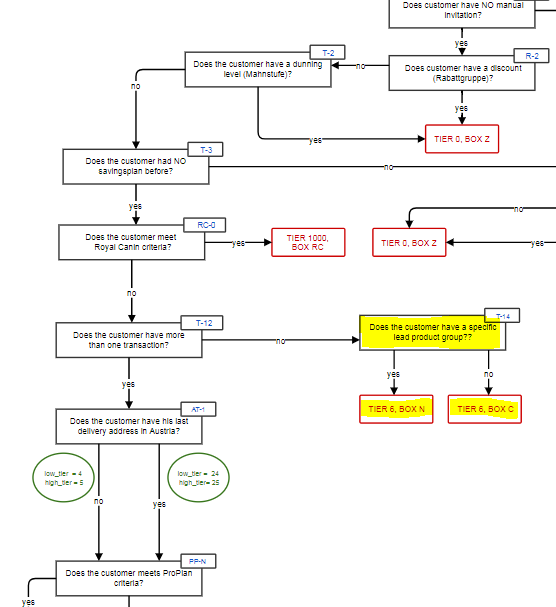

But in the new routine diagram, customers not having two or more transactions become directly non-eligible...

**Savings Plan Eligibility Routine NEW**

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
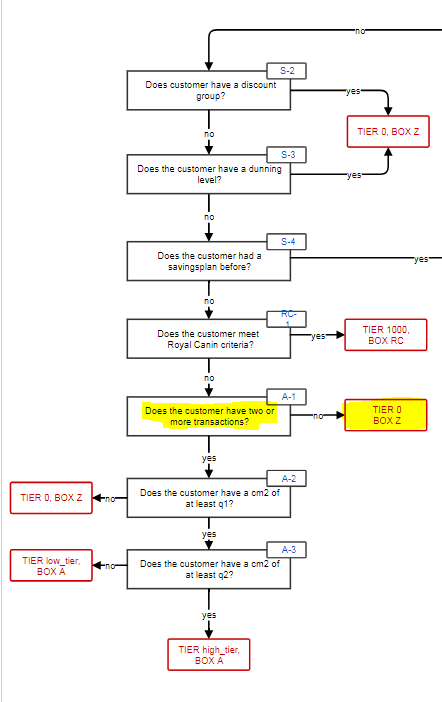

**What is the window at the time of calculating 'Has the customer two or more orders finished'?**

<html><head>


<!-- Load require.js. Delete this if your page already loads require.js -->
<script src="https://cdnjs.cloudflare.com/ajax/libs/require.js/2.3.4/require.min.js" integrity="sha256-Ae2Vz/4ePdIu6ZyI/5ZGsYnb+m0JlOmKPjt6XZ9JJkA=" crossorigin="anonymous"></script>
<script src="https://unpkg.com/@jupyter-widgets/html-manager@*/dist/embed-amd.js" crossorigin="anonymous"></script>
<script type="application/vnd.jupyter.widget-state+json">
{
    "version_major": 2,
    "version_minor": 0,
    "state": {}
}
</script>
</head>
<body>


</body>
</html>
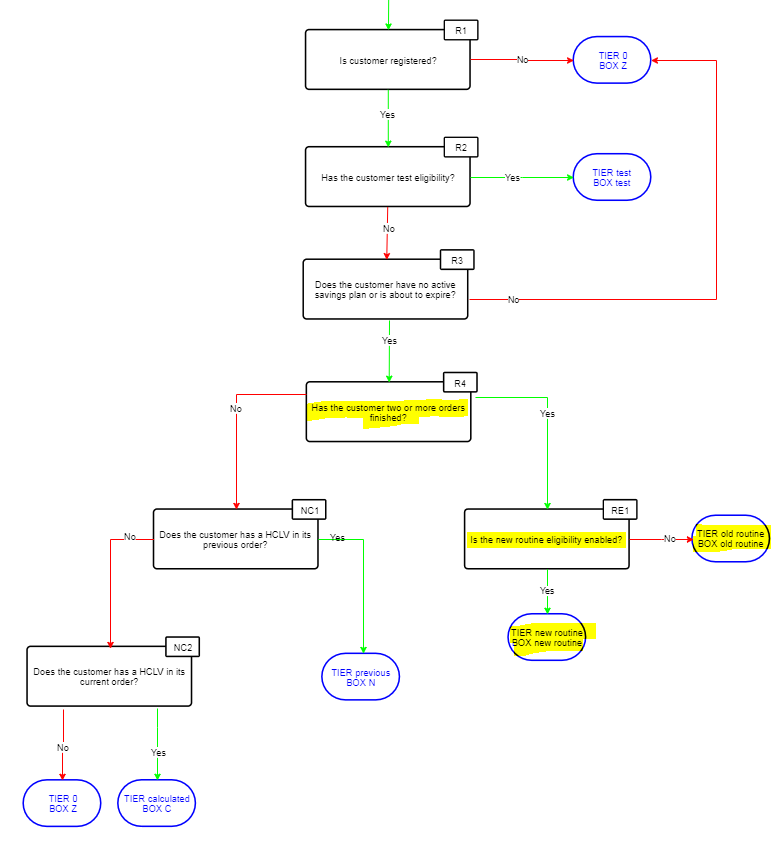